<a href="https://colab.research.google.com/github/natrese/Estad-stica/blob/main/Estad%C3%ADstica_bono_1_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
import scipy.stats as stats
import math

# **Estadística descriptiva para variable cualitativas**


*   Gráficos para datos de una variable cualitativa
*   Proporciones asociadas a los valores de una variable cualitativa


In [2]:
from google.colab import files
uploaded=files.upload()

Saving asriosgu_nac2020.csv to asriosgu_nac2020.csv


In [5]:
io_csv=io.BytesIO(uploaded["asriosgu_nac2020.csv"])
tabla = pd.read_csv(io_csv,sep=",",index_col=0,encoding="latin-1")
tabla.head(3)

,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,AREA_RES,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
44,560,3,2,NaN,2,9,9,2020,11,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5


In [7]:
tabla1=tabla[["T_GES","TALLA_NAC","EDAD_MADRE"]]
tabla1.head(4)

,T_GES,TALLA_NAC,EDAD_MADRE
COD_DPTO,,,
44,6,9,4
44,6,9,4
44,6,9,5
44,6,9,5


In [16]:
df2=tabla1[(tabla1.T_GES<9)&(tabla1.TALLA_NAC!=9)&(tabla1.EDAD_MADRE!=99)]
df2.head(4)

,T_GES,TALLA_NAC,EDAD_MADRE
COD_DPTO,,,
52,4,4,5
20,4,5,4
27,4,5,3
27,4,4,5


1. ¿Cómo se comporta la variable tiempo de gestación de un nacido vivo en Colombia (T_GES)?

In [18]:
df2.T_GES.head(2)
df2.T_GES=df2.T_GES.astype(str)
df2.T_GES.head(2)

<ipython-input-18-19fed1ce82a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.T_GES=df2.T_GES.astype(str)


COD_DPTO
52    4
20    4
Name: T_GES, dtype: object

In [20]:
df2.loc[(df2.T_GES=="1"), "T_GES"], df2.loc[(df2.T_GES=="2"), "T_GES"], df2.loc[(df2.T_GES=="3"), "T_GES"], df2.loc[(df2.T_GES=="4"), "T_GES"]="0-21", "22-27","28-37", "38-41"
df2.loc[(df2.T_GES=="5"), "T_GES"], df2.loc[(df2.T_GES=="6"), "T_GES"], df2.loc[(df2.T_GES=="9"), "T_GES"]=">42", "ignorado", "NA"
df2.head(5)

,T_GES,TALLA_NAC,EDAD_MADRE
COD_DPTO,,,
52,38-41,4,5
20,38-41,5,4
27,38-41,5,3
27,38-41,4,5
27,38-41,5,3


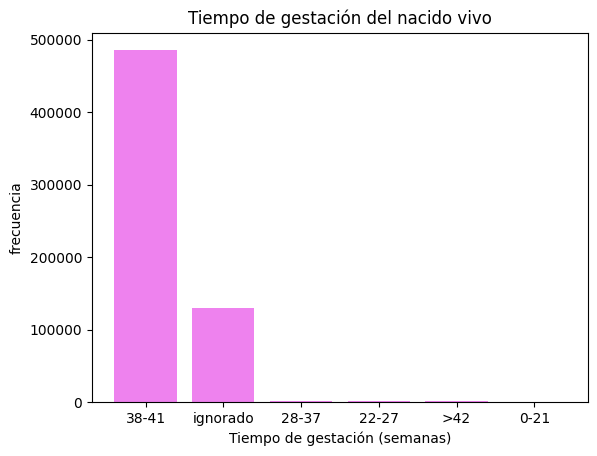

In [29]:
x_values=df2.T_GES.unique()
y_values=df2.T_GES.value_counts().tolist()
plt.bar(x_values,y_values, color="violet" )
plt.title("Tiempo de gestación del nacido vivo")
ax=plt.subplot()
ax.set_xlabel("Tiempo de gestación (semanas)")
ax.set_ylabel("frecuencia")
plt.show()

El valor de 38 a 41 semanas es el rango de gestación donde se tienen alrededor de $490000$ nacidos, lo que indica que es el rango con mayor número de nacidos. En  el rango de gestación ignorado se tiene aproximandamente $120000$ nacidos.Los rango de 28 a 37, 22 a 27, mas de 42 y de 0 a 21, tienen menos de 100000 nacidos.

In [30]:
sizes=np.array(y_values)
sizes

array([485426, 130484,   2236,   1461,   1163,     28])

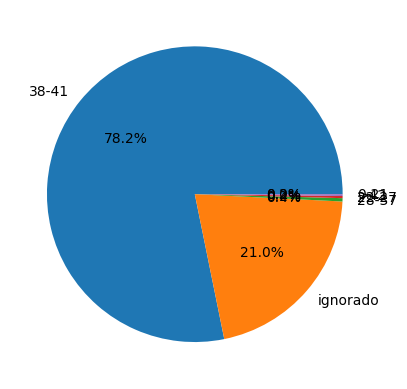

In [31]:
plt.pie(y_values, labels=x_values, autopct="%1.1f%%")
plt.show()

In [32]:
len(df2.T_GES)

620798

In [33]:
porcentaje=[(x/len(df2.T_GES)*100)for x in y_values]
print(x_values)
print(porcentaje)

['38-41' 'ignorado' '28-37' '22-27' '>42' '0-21']
[78.19387304727141, 21.018753282065987, 0.3601815727499122, 0.23534225303560902, 0.18733952106804466, 0.004510323809032889]


Aproximadamente $78.19$% de los nacidos en Colombia tuvieron entre 38 y 41 semanas de gestación, el $21.02$% corresponde al rango ignorado, el $0.36$% corresponde al rango de semanas entre 28 y 37, el $0.23$% corresponde al rango de semanas entre 22 y 27, mientras que el rango de mas de 42 semanas tiene un $0.18$% y el $0.0045$% corresponde a las semanas entre 0 y 21.

Lo anterior indica que el $99$% de los nacidos tuvo un tiempo de gestación de 38 a 41 semanas o dentro del rango ignorado.

2. ¿Cómo se comporta la variable talla de nacimiento de un nacido vivo en Colombia (TALLA_NAC)?


In [34]:
df2.TALLA_NAC.head(2)
df2.TALLA_NAC=df2.TALLA_NAC.astype(str)
df2.TALLA_NAC.head(2)

<ipython-input-34-75313620c94f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.TALLA_NAC=df2.TALLA_NAC.astype(str)


COD_DPTO
52    4
20    5
Name: TALLA_NAC, dtype: object

In [35]:
df2.loc[(df2.TALLA_NAC=="1"), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC=="2"), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC=="3"), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC=="4"), "TALLA_NAC"]="menos de 20", "20-29","30-39", "40-49"
df2.loc[(df2.TALLA_NAC=="5"), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC=="6"), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC=="9"), "TALLA_NAC"]="50-59", "60 y mas", "NA"
df2.head(5)

,T_GES,TALLA_NAC,EDAD_MADRE
COD_DPTO,,,
52,38-41,40-49,5
20,38-41,50-59,4
27,38-41,50-59,3
27,38-41,40-49,5
27,38-41,50-59,3


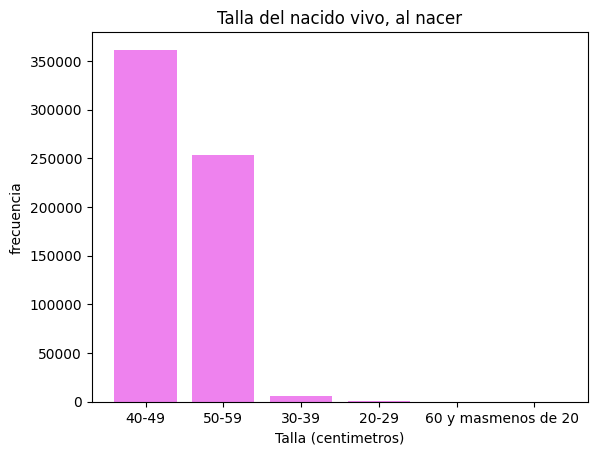

In [36]:
x_values=df2.TALLA_NAC.unique()
y_values=df2.TALLA_NAC.value_counts().tolist()
plt.bar(x_values,y_values, color="violet" )
plt.title("Talla del nacido vivo, al nacer")
ax=plt.subplot()
ax.set_xlabel("Talla (centimetros)")
ax.set_ylabel("frecuencia")
plt.show()

El valor de 40 a 49 centimetros es el rango de talla donde se tienen alrededor de $360000$ nacidos, lo que indica que es el rango con mayor número de nacidos. En  el rango de talla 50 a 59 se tienen aproximandamente $250000$ nacidos.Los rango de 30 a 39, 20 a 29, mas de 60 y más y  menos de 20, tienen menos de 500000 nacidos.

In [37]:
sizes=np.array(y_values)
sizes

array([361426, 253062,   5716,    477,    115,      2])

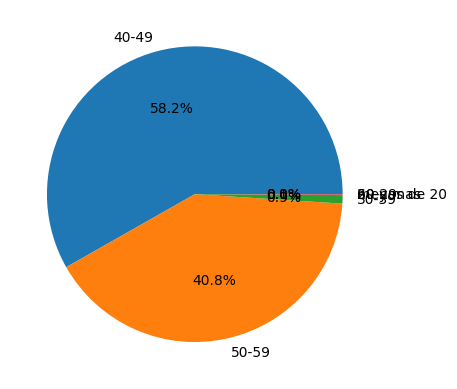

In [38]:
plt.pie(y_values, labels=x_values, autopct="%1.1f%%")
plt.show()

In [39]:
len(df2.TALLA_NAC)

620798

In [40]:
porcentaje=[(x/len(df2.TALLA_NAC)*100)for x in y_values]
print(x_values)
print(porcentaje)

['40-49' '50-59' '30-39' '20-29' '60 y mas' 'menos de 20']
[58.21958189298291, 40.7639844200529, 0.9207503890154286, 0.07683658774673888, 0.018524544215670798, 0.00032216598635949215]


Aproximadamente $58.22$% de los nacidos en Colombia tuvieron entre 40 y 49 centímetros, el $40.76$% corresponde al rango de 50 a 59 centímetros, el $0.92$% corresponde al rango entre 30 y 39, el $0.076$% corresponde al rango de entre 20 y 29 cm, mientras que el rango de mas de 60 centímetros tiene un $0.018$% y el $0.0003$% corresponde a menos de 20 centímetros.

Lo anterior indica que más del $98$% de los nacidos tuvo entre 40 y 59 centímetros al nacer.

3. ¿Alguna variable depende de la otra, o, están asociadas? ¿Qué tan dependiente es una
variable de la otra o qué tan asociadas están ambas?

In [41]:
tabla_cont=pd.crosstab(df2.T_GES, df2["TALLA_NAC"])
tabla_cont

TALLA_NAC,20-29,30-39,40-49,50-59,60 y mas,menos de 20
T_GES,,,,,,
0-21,22,6,0,0,0,0
22-27,260,1872,102,0,0,2
28-37,53,3619,89212,37592,8,0
38-41,75,198,162539,322513,101,0
>42,0,0,256,902,5,0
ignorado,67,21,953,419,1,0


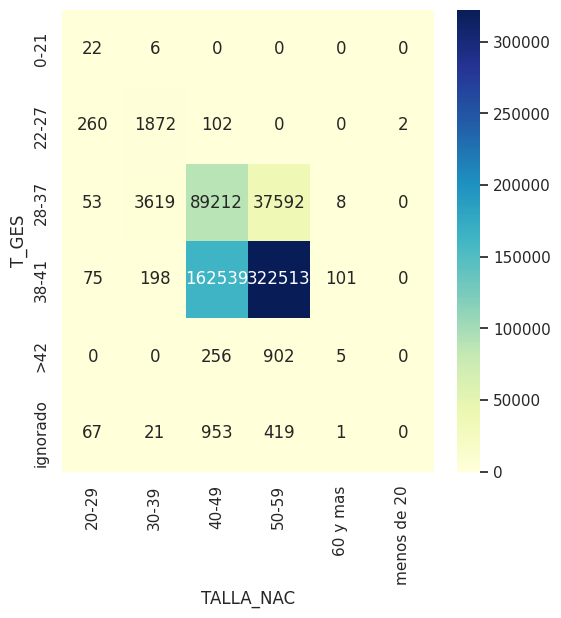

In [42]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,6))
heatmap=sns.heatmap(tabla_cont, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.show()

In [47]:
res=stats.chi2_contingency(tabla_cont)
chi, valor_p, _, _=res
print(f"El valor de la estadística Chi cuadrado es {chi} y el valor de p es de {valor_p}")

El valor de la estadística Chi cuadrado es 300045.3297185701 y el valor de p es de 0.0


Como el valor p es igual $0.0 < 0.05$ se rechaza la hipótesis nula, es decir, no se rechaza con una confianza del $95$% que el tiempo de gestación del nacido vivo y la talla del nacido vivo, al nacer estan asociadas para los individuos recién nacidos en Colombia.


In [50]:
coeficiente_contingencia=math.sqrt(chi/(chi+len(df2.T_GES)))
coeficiente_phi=math.sqrt(chi/len(df2.T_GES))
coeficiente_v_cramer=math.sqrt(chi/(len(df2.T_GES)*min(6-1,6-1)))
print(f"los coeficientes de contingencia, phi y V de cramer están respectivamente dados por {coeficiente_contingencia},{coeficiente_phi} y {coeficiente_v_cramer}")

los coeficientes de contingencia, phi y V de cramer están respectivamente dados por 0.5708218152971455,0.6952136347963199 y 0.3109089892578569


Las variable talla del nacido vivo, al nacer depende dicretamente de tiempo de gestación del nacido vivo, según el valor de V de cramer, depende moderdamente de acuerdo con el valor de contingencia y depende sustancialmente según el valor de phi.
